PCA

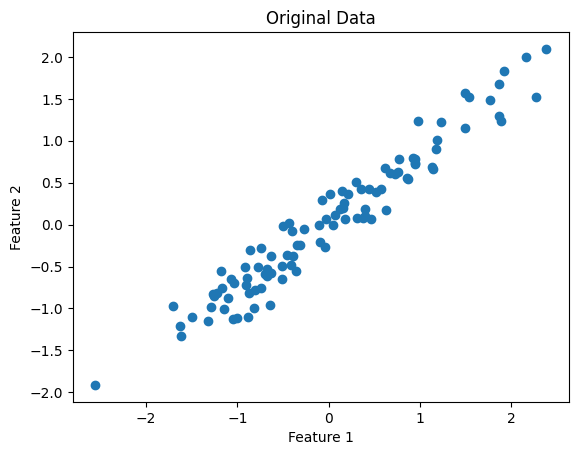

Eigenvalues: [1.73846554 0.02528534]
Eigenvectors:
 [[ 0.77525725 -0.63164563]
 [ 0.63164563  0.77525725]]


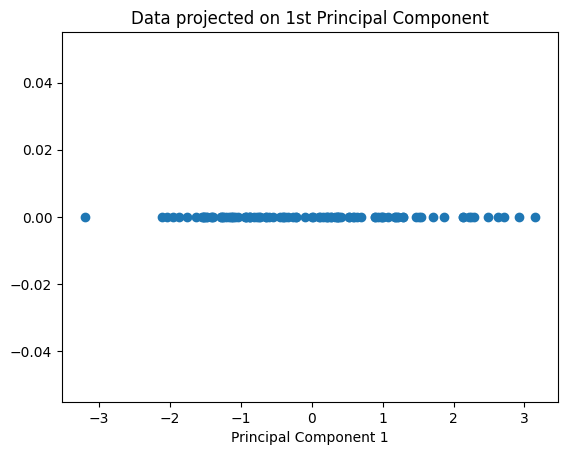

Variance explained: [0.98566388]


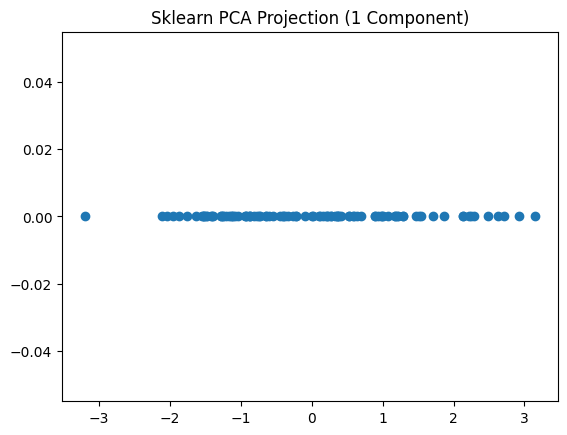

In [1]:
# ========================================
# Import Libraries
# ========================================
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# ========================================
# PART 1: Generate Sample Data (2D)
# ========================================
np.random.seed(0)
X = np.random.randn(100,2)
X[:,1] = X[:,0]*0.8 + X[:,1]*0.2  # Correlated features

plt.scatter(X[:,0], X[:,1])
plt.title("Original Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# ========================================
# PART 2: Covariance Matrix & Eigenvectors
# ========================================
# Center the data
X_centered = X - X.mean(axis=0)
cov_matrix = np.cov(X_centered.T)

eigvals, eigvecs = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigvals)
print("Eigenvectors:\n", eigvecs)

# ========================================
# PART 3: Project Data onto First Principal Component
# ========================================
# Sort eigenvectors by eigenvalue descending
idx = np.argsort(eigvals)[::-1]
eigvecs_sorted = eigvecs[:,idx]
X_pca = X_centered.dot(eigvecs_sorted[:,0].reshape(-1,1))

plt.scatter(X_pca, np.zeros_like(X_pca))
plt.title("Data projected on 1st Principal Component")
plt.xlabel("Principal Component 1")
plt.show()

# ========================================
# PART 4: Using sklearn PCA
# ========================================
pca = PCA(n_components=1)
X_reduced = pca.fit_transform(X)
print("Variance explained:", pca.explained_variance_ratio_)

plt.scatter(X_reduced, np.zeros_like(X_reduced))
plt.title("Sklearn PCA Projection (1 Component)")
plt.show()
